In [2]:
#!pip install datascience
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Random choice

In [28]:
coin = make_array('Heads', 'Tails')
coin

array(['Heads', 'Tails'], dtype='<U5')

In [29]:
np.random.choice(coin)

'Tails'

In [30]:
np.random.choice(coin, 10)

array(['Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails',
       'Tails', 'Heads', 'Tails'], dtype='<U5')

In [34]:
two_groups = make_array('treatment', 'control')
outcomes = np.random.choice(two_groups, 10)
outcomes

array(['control', 'control', 'control', 'treatment', 'control',
       'treatment', 'control', 'treatment', 'control', 'control'],
      dtype='<U9')

In [35]:
outcomes == 'control'

array([ True,  True,  True, False,  True, False,  True, False,  True,
        True])

In [36]:
#sum(outcomes)

In [37]:
sum(outcomes == 'control')

7

In [38]:
sum(outcomes == 'treatment')

3

## Conditional Statements

In [41]:
x = 0
if x > 0:
    print('positive')
elif x < 0:
    print('negative')
else:
    print('zero')

zero


In [42]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

In [43]:
sign(-3)

'negative'

In [44]:
numbers=make_array(-1,1,0)
numbers

array([-1,  1,  0], dtype=int64)

In [45]:
random_numbers=Table().with_column("RN",np.random.choice(numbers, 30))
random_numbers.with_column("Signs",random_numbers.apply(sign,"RN"))

RN,Signs
0,zero
0,zero
0,zero
0,zero
-1,negative
-1,negative
1,positive
0,zero
1,positive
0,zero


## For Statements

In [46]:
np.arange(4)

array([0, 1, 2, 3])

In [47]:
for i in np.arange(4):
    print('iteration', i)

iteration 0
iteration 1
iteration 2
iteration 3


In [48]:
for things in ['a',"b",'c', 1, [1,2,3]]:
    print('This time through the for loop * things * is ', things, '.')

This time through the for loop * things * is  a .
This time through the for loop * things * is  b .
This time through the for loop * things * is  c .
This time through the for loop * things * is  1 .
This time through the for loop * things * is  [1, 2, 3] .


In [50]:
coin

array(['Heads', 'Tails'], dtype='<U5')

In [51]:
sum(np.random.choice(coin, 100) == 'Heads')

50

That was one experiment (flipping 100 times).  What if we wanted to repeat 10,000 experiments, and produce a table of results?

In [52]:
num_heads = make_array(sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([51], dtype=int64)

In [53]:
num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([51, 44], dtype=int64)

In [54]:
num_heads = make_array()
for i in np.arange(10000):
    num_heads = np.append(num_heads, sum(np.random.choice(coin, 100) == 'Heads'))
num_heads

array([53., 45., 49., ..., 44., 57., 52.])

In [55]:
len(num_heads)

10000

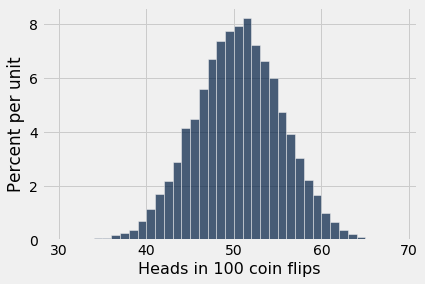

In [56]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30, 70, 1))

In [57]:
most = t.group('Heads in 100 coin flips')\
        .where('Heads in 100 coin flips', are.between(40, 60))
most.show()

Heads in 100 coin flips,count
40,114
41,170
42,219
43,289
44,416
45,448
46,561
47,671
48,736
49,773


In [58]:
sum(most.column('count')) / t.num_rows * 100

95.61

In [59]:
#noaccident that it's 95%

## Monty Hall

In [2]:
doors = make_array(1, 2, 3)
doors

array([1, 2, 3])

In [3]:
prizes = make_array('car', 'first goat', 'second goat')
prizes

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [4]:
np.random.choice(prizes, 3, replace=False)

array(['first goat', 'car', 'second goat'], dtype='<U11')

In [5]:
def setup():
    """Return a random game of Let's Make a Deal."""
    return Table().with_columns(
        'Door', doors,
        'Prize', np.random.choice(prizes, 3, replace=False)
    )

a_game = setup()
a_game

Door,Prize
1,second goat
2,first goat
3,car


In [6]:
def behind(game, door):
    """Return the prize behind a door."""
    return game.where('Door', door).column('Prize').item(0)

for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the second goat
Behind door number 2 is the first goat
Behind door number 3 is the car


In [7]:
def location(game, prize):
    """Return the door that hides a prize."""
    return game.where('Prize', prize).column('Door').item(0)

for prize in prizes:
    print('The', prize, 'is behind door number', location(a_game, prize))

The car is behind door number 3
The first goat is behind door number 2
The second goat is behind door number 1


In [8]:
a_guess = np.random.choice(doors)
a_guess

1

In [9]:
def expose(game, guess):
    """Return the door that Monty Hall opens to expose a goat."""
    guessed_prize = behind(game, guess)
    if guessed_prize == 'first goat':
        reveal = 'second goat'
    elif guessed_prize == 'second goat':
        reveal = 'first goat'
    else:
        reveal = np.random.choice(['first goat', 'second goat'])
    return location(game, reveal)

an_exposed_door = expose(a_game, a_guess)
print('The contestant picked door', a_guess, 'which hides the', behind(a_game, a_guess))
print('Monty Hall opens door', an_exposed_door, 'to expose the', behind(a_game, an_exposed_door))

The contestant picked door 1 which hides the second goat
Monty Hall opens door 2 to expose the first goat


In [10]:
def other(game, guess, exposed):
    """Return the door that is not the guess or the exposed."""
    return (1 + 2 + 3) - guess - exposed

the_remaining_door = other(a_game, a_guess, an_exposed_door)
print('The remaining door', the_remaining_door, 'hides the', behind(a_game, the_remaining_door))

The remaining door 3 hides the car


In [11]:
# A different way to create a table: provide the labels as a list
trials = Table(['trial', 'guess', 'exposed', 'remaining'])
for i in np.arange(1, 10000+1):
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    # Append one row to the table
    trials.append([i, behind(game, guess), behind(game, exposed), behind(game, remaining)])
    
trials

trial,guess,exposed,remaining
1,car,first goat,second goat
2,car,second goat,first goat
3,first goat,second goat,car
4,first goat,second goat,car
5,car,first goat,second goat
6,first goat,second goat,car
7,first goat,second goat,car
8,car,first goat,second goat
9,first goat,second goat,car
10,second goat,first goat,car


In [12]:
trials.group('guess')

guess,count
car,3261
first goat,3269
second goat,3470


In [13]:
trials.group('exposed')

exposed,count
first goat,5125
second goat,4875


In [14]:
trials.group('remaining')

remaining,count
car,6739
first goat,1606
second goat,1655


In [15]:
compare = trials.group('guess')\
                .relabeled('count', 'Guess Count')\
                .join('guess', trials.group('remaining'), 'remaining')\
                .relabeled('count', 'Remaining Count')\
                .relabeled('guess', 'Prize')
compare

Prize,Guess Count,Remaining Count
car,3261,6739
first goat,3269,1606
second goat,3470,1655


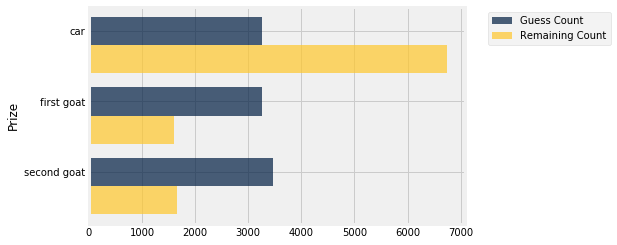

In [16]:
compare.barh('Prize')

## Probability

#### 3 Cards: Red, Green, Blue

What's the chance of GR (first G, second R) when sampling two cards without replacement?



A. 1/6

B. 1/3

C. 1/2

D. Something else


<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>




 

Outcomes are: RB RG BR BG GR GB
Probability is 1/6

What's the probability of drawing the red card either first or second when drawing without replacement?

#### Multiplication rule

P(GR) = P(drew G first)  ×  P(drew R second given that drew G first) 

      = 1/3  ×  1/2

#### Addition rule

What's the chance of one R and one G in any order when sampling two cards without replacement?













P(one R and one G in any order) = P(GR) + P(RG) = 1/6 + 1/6

#### Example: Flipping coin ten times 

P(at least one H) = 1 - P(no H) = 1 - P(TTTTTTTTTT) = 1 - (1/2)**10

In [ ]:
1-(1/2)**10

Roll a six-sided die 20 times. What's P(at least one 6)?

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

### Calculation

In [ ]:
1 - (5/6) ** 20

In [3]:
rolls = np.arange(1, 51, 1)
at_least_one = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
at_least_one.set_format(1, PercentFormatter(3))

Rolls,Chance of at least one 6
1,16.667%
2,30.556%
3,42.130%
4,51.775%
5,59.812%
6,66.510%
7,72.092%
8,76.743%
9,80.619%
10,83.849%


In [ ]:
at_least_one.scatter('Rolls')

In [ ]:
at_least_one.where('Rolls', 20)